# Line Broadening

### Caltech Summer 2019

This notebook explores broadening of spectral lines as expected from FU Ori accretion disks. Started on 26 June 2019.

Things to make sure you understand:
1. The integral of $\phi(\lambda)$ should be normalized to 1. This way, the amplitude of the broadened line is consistent.
2. Wherever the profile $\phi(\lambda)$ goes to infinity, the next points beyond that should be zero (the function has vertical asymptotes). So make sure those aren't being integrated in the convolution.
3. Integrate in your convolution past that limit of the vertical asymptotes to get their contribution in there as well.

### Imports 

In [9]:
import numpy as np
import astropy.io.fits as fits
from astropy.convolution import convolve, convolve_fft
import matplotlib.pyplot as plt

### Constants (astronomy is in cgs, right?)

In [10]:
G = 6.67259e-8
SIG_SB = 5.67051e-5
M_SUN = 1.99e33
R_SUN = 6.96e10
L_SUN = 3.839e33
h_PLANCK = 6.6260755e-27
c_LIGHT = 2.99792458e10
k_BOLTZ = 1.380658e-16

## Applying the Doppler convolution to a toy spectral line

**Note**: Sticking to $M_* = M_\odot$ for now...

This is just (with the integral normalized to 1): 

$\phi(\lambda) = \dfrac{1}{\pi\lambda_m}\Big[1 - \Big(\dfrac{\lambda - \lambda_0}{\lambda_m}\Big)^{2}\Big]^{-1/2}$

In [11]:
def dopplerProfile(l_0, r, inc, l):
    v = (G*M_SUN/r)**(1/2)
    lmax = (l_0*v*np.sin(inc)/c_LIGHT)
    return lmax, (1 - ((l-l_0)/lmax)**2)**(-1/2)

Setting a Gaussian as a test spectral feature

In [12]:
MU = 4000e-8
SIG = 0.5e-8
DIFF = 4e-8
BIN = 1e-11

LOW = MU - DIFF
UPP = MU + DIFF

x = np.arange(LOW, UPP + BIN, BIN)

def gaussianFeature(x):
    return -1*np.exp(-0.5*((x-MU)/SIG)**2)

In [13]:
def dopplerProfileNorm(l, l_0, r, inc):
    l_out = np.zeros(len(l))
    v = (G*M_SUN/r)**(1/2)
    lmax = (l_0*v*np.sin(inc)/c_LIGHT)
    for i in range(len(l)):
        if np.abs(l[i]-l_0) < lmax:
            l_out[i] = (1/(np.pi*lmax))*(1 - ((l[i]-l_0)/lmax)**2)**(-1/2)
    return l_out

In [14]:
dopp_arr = dopplerProfileNorm(x, MU, 20*R_SUN, np.radians(45))
gauss_arr = gaussianFeature(x)
conv_arr = convolve(gauss_arr, dopp_arr)

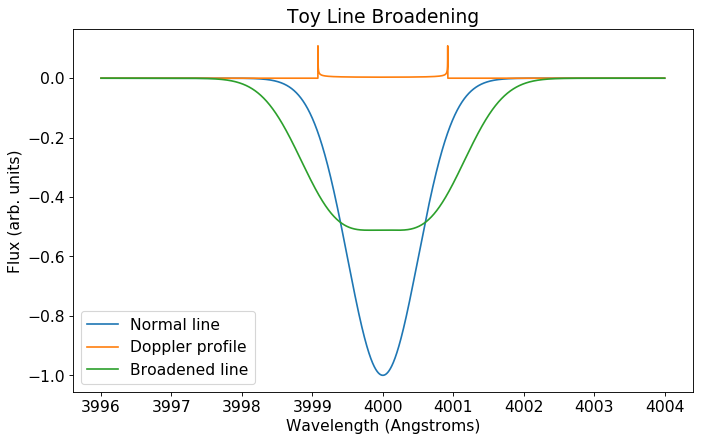

In [18]:
fig=plt.figure(figsize=(10, 6), dpi= 80)
plt.rcParams.update({'font.size': 14})

plt.plot(x*1e8,gauss_arr, label='Normal line')
plt.plot(x*1e8, dopp_arr*1e-10, label='Doppler profile')
plt.plot(x*1e8, conv_arr, label='Broadened line')
plt.title('Toy Line Broadening')
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux (arb. units)')
plt.legend()
plt.show()